# Descriptive analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sb

In [2]:
census = pd.read_csv('Census.csv')

## Statistics

In [3]:
census.describe()

,Person ID,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
count,5.697400e+05,569740.00000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,569740.000000,267419.000000,569740.000000
mean,7.679353e+06,2.01187,1.018731,1.507551,3.978676,1.856201,1.777904,1.016237,1.658323,1.191247,2.419384,0.685597,1.240982,2.459843,-3.487106,35.234789,0.034123
std,1.644699e+05,2.35879,0.159058,0.499943,2.219494,1.125021,0.415656,1.153095,1.486599,1.391857,2.493065,5.265470,6.521825,7.398951,5.887538,13.520881,4.862673
min,7.394483e+06,-9.00000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,1.000000,-9.000000
25%,7.536918e+06,2.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,27.000000,1.000000
50%,7.679352e+06,2.00000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,4.000000,-9.000000,37.000000,2.000000
75%,7.821787e+06,3.00000,1.000000,2.000000,6.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,5.000000,6.000000,8.000000,3.000000,45.000000,3.000000
max,7.964223e+06,6.00000,3.000000,2.000000,8.000000,5.000000,2.000000,2.000000,5.000000,5.000000,9.000000,9.000000,9.000000,12.000000,4.000000,60.000000,4.000000


In [4]:
census.columns

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

In [5]:
print(len(census)) # Verifică numărul de caracteristici din setul de date
print(len(census.columns)) # Verifică tipurile de date ale fiecărei coloane
print(census.dtypes)

569740
19
Person ID                      int64
Region                        object
Residence Type                object
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object


In [6]:
census.isnull().sum()

,0
Person ID,0
Region,0
Residence Type,0
Family Composition,0
Population Base,0
Sex,0
Age,0
Marital Status,0
Student,0
Country of Birth,0


In [7]:
# Aflarea variabilei categorice și variabilei numerice
numericalCol = census.select_dtypes(exclude=object).columns
categoricalCol = census.select_dtypes(include=object).columns
print('Categorical Columns: ', categoricalCol)
print('Numerical Columns: ', numericalCol)

Categorical Columns:  Index(['Region', 'Residence Type'], dtype='object')
Numerical Columns:  Index(['Person ID', 'Family Composition', 'Population Base', 'Sex', 'Age',
       'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Industry', 'Hours worked per week', 'No of hours',
       'Approximated Social Grade'],
      dtype='object')


In [8]:
# Verificați orice număr de coloane cu valori NaN sau lipsă
print(census.isnull().any().sum(), ' / ', len(census.columns))
# Verificați orice număr de puncte de date cu NaN
print(census.isnull().any(axis=1).sum(), ' / ', len(census))

1  /  19
302321  /  569740


In [3]:
#replace the -9 values to 0
census.replace(-9,0, inplace=True)

In [4]:
census['No of hours'].fillna(0, inplace=True)

<ipython-input-4-4220eda6a5b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census['No of hours'].fillna(0, inplace=True)


## Visualisation

<ipython-input-11-b25198171803>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(


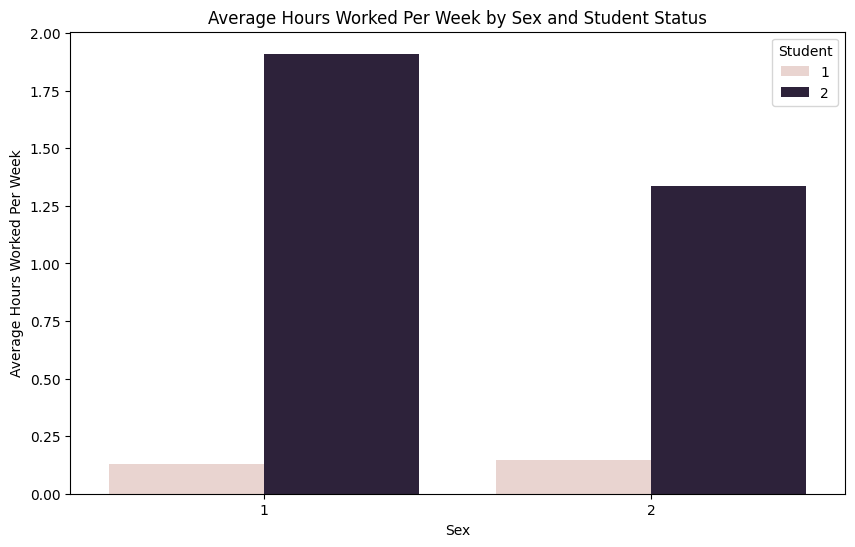

In [11]:
# Barplot
plt.figure(figsize=(10, 6))
sb.barplot(
    data=census,
    x="Sex",
    y="Hours worked per week",
    hue="Student",
    estimator='mean',
    ci=None  # Remove confidence intervals for clarity
)
plt.title("Average Hours Worked Per Week by Sex and Student Status")
plt.ylabel("Average Hours Worked Per Week")
plt.xlabel("Sex")
plt.legend(title="Student")
plt.show()

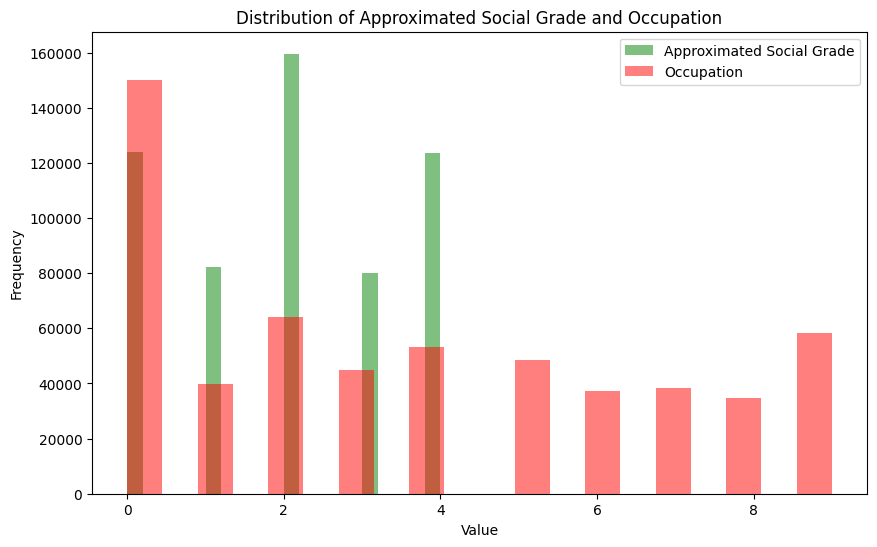

In [12]:
# histogram
plt.figure(figsize=(10,6))
plt.hist(census['Approximated Social Grade'], bins=20, alpha=0.5, label='Approximated Social Grade', color='green')
plt.hist(census['Occupation'], bins=20, alpha = 0.5, label='Occupation', color='red')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Approximated Social Grade and Occupation")
plt.legend(loc='upper right')
plt.show()

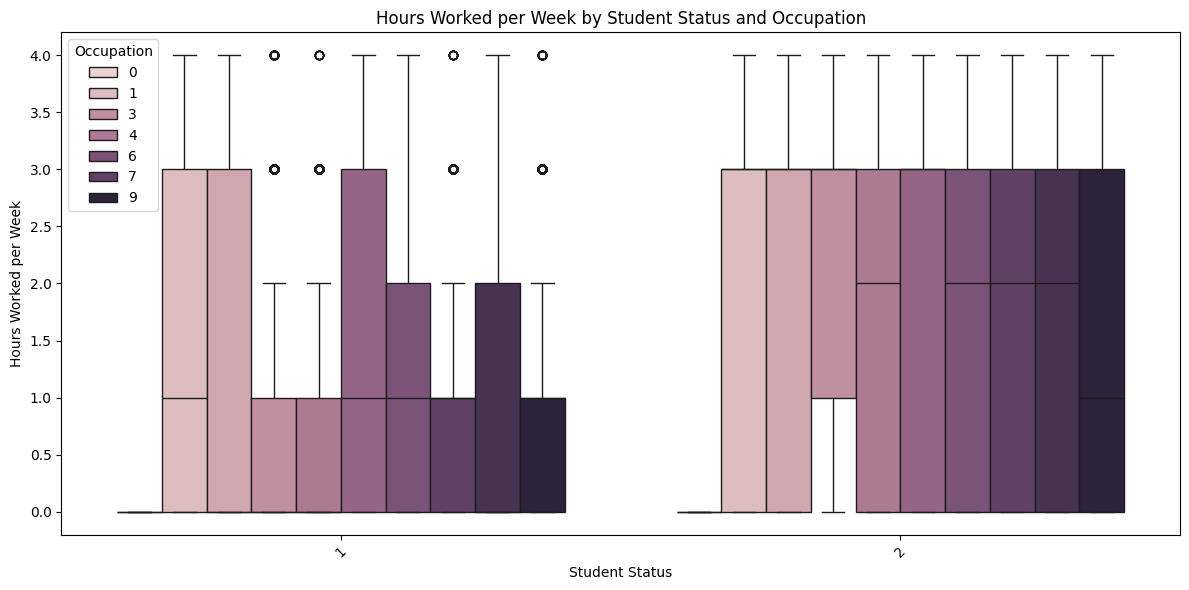

In [13]:
#box plot
if all(col in census.columns for col in ['Student', 'Occupation', 'Hours worked per week']):
    # Create a box plot
    plt.figure(figsize=(12, 6))
    sb.boxplot(
        x='Student',             # Categorical attribute for x-axis
        y='Hours worked per week',  # Numeric attribute for y-axis
        hue='Occupation',          # Grouping by occupation
        data=census                # The dataset
    )

    # Customize the plot
    plt.title('Hours Worked per Week by Student Status and Occupation')
    plt.xlabel('Student Status')
    plt.ylabel('Hours Worked per Week')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.legend(title='Occupation')
    plt.tight_layout()
    plt.show()
else:
    print("Ensure 'Student', 'Occupation', and 'Hours worked per week' exist in the dataset.")

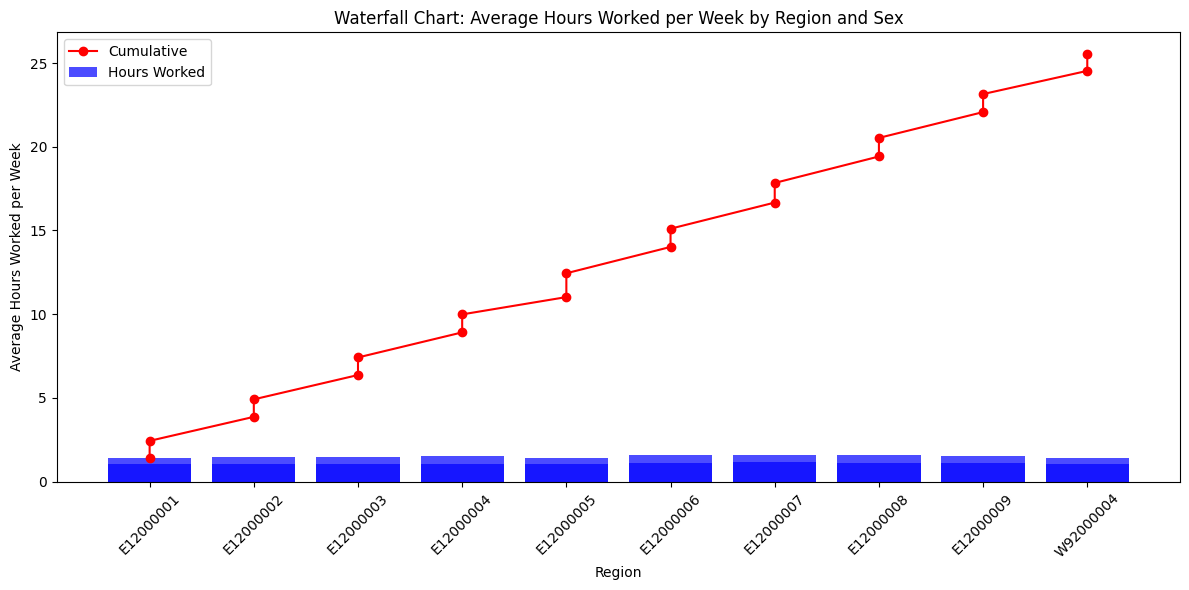

In [14]:
#waterfall chart
import matplotlib.pyplot as plt

# Assuming your 'census' DataFrame is already loaded
# Group by 'Region' and 'Sex' and calculate mean 'Hours worked per week'
df = census.groupby(['Region', 'Sex'])['Hours worked per week'].mean().reset_index()

# Sort by 'Region' for plotting
df = df.sort_values('Region')

# Calculate the cumulative sum of 'Hours worked per week' for the waterfall effect
df['Cumulative'] = df['Hours worked per week'].cumsum()

# Create the waterfall chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df['Region'], df['Hours worked per week'], color='blue', alpha=0.7, label='Hours Worked')
ax.plot(df['Region'], df['Cumulative'], color='red', marker='o', label='Cumulative')

# Add titles and labels
plt.title("Waterfall Chart: Average Hours Worked per Week by Region and Sex")
plt.xlabel("Region")
plt.ylabel("Average Hours Worked per Week")
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

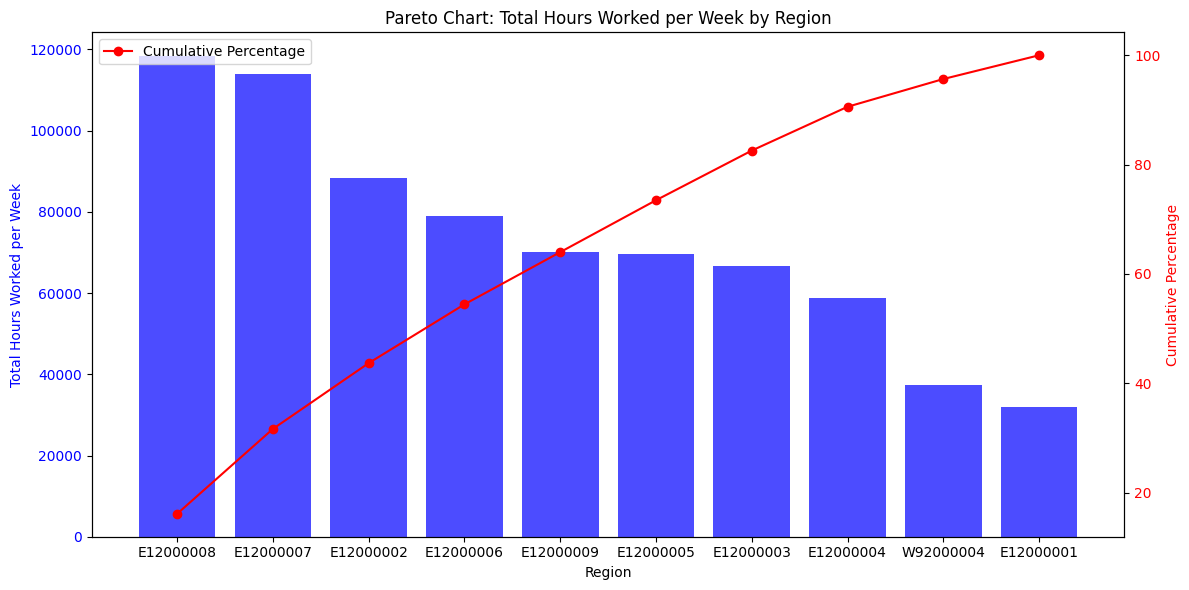

In [15]:
#Pareto chart
# Group by 'Region' and calculate the total of 'Hours worked per week'
region_data = census.groupby('Region')['Hours worked per week'].sum().reset_index()

# Sort the data in descending order of 'Hours worked per week'
region_data = region_data.sort_values('Hours worked per week', ascending=False)

# Calculate the cumulative percentage
region_data['Cumulative'] = region_data['Hours worked per week'].cumsum()
region_data['Cumulative Percentage'] = 100 * region_data['Cumulative'] / region_data['Hours worked per week'].sum()

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for the 'Hours worked per week'
ax1.bar(region_data['Region'], region_data['Hours worked per week'], color='blue', alpha=0.7)
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Hours Worked per Week', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the cumulative line chart
ax2 = ax1.twinx()
ax2.plot(region_data['Region'], region_data['Cumulative Percentage'], color='red', marker='o', linestyle='-', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and labels
plt.title("Pareto Chart: Total Hours Worked per Week by Region")
ax2.legend(loc='upper left')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Preprocessing

In [5]:
census1 = census.copy()

In [6]:
#replace the string values into int
labels, uniques = pd.factorize(census1['Region'])
census1['Region'] = labels

In [7]:
#replace the string values into int
labels, uniques = pd.factorize(census1['Residence Type'])
census1['Residence Type'] = labels

In [13]:
print(len(census1)) # Verifică numărul de caracteristici din setul de date
print(len(census1.columns)) # Verifică tipurile de date ale fiecărei coloane
print(census1.dtypes)

569740
19
Person ID                      int64
Region                         int64
Residence Type                 int64
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object


In [14]:
census1.isnull().sum()

,0
Person ID,0
Region,0
Residence Type,0
Family Composition,0
Population Base,0
Sex,0
Age,0
Marital Status,0
Student,0
Country of Birth,0


In [15]:
#correlations
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Function to calculate correlation ratio (eta squared) for categorical vs. numerical
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    overall_mean = np.mean(values)
    numerator = sum([len(values[categories == cat]) * (np.mean(values[categories == cat]) - overall_mean) ** 2 for cat in np.unique(categories)])
    denominator = sum((values - overall_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Get the list of columns
columns = census1.columns
correlations = {}

# Loop through pairs of columns to calculate correlation
for col1 in columns:
    for col2 in columns:
        # Skip if it's the same column
        if col1 == col2:
            continue
        key = f"{col1} vs {col2}"

        # Numeric vs Numeric: Use Pearson correlation
        if np.issubdtype(census1[col1].dtype, np.number) and np.issubdtype(census1[col2].dtype, np.number):
            correlations[key] = census1[col1].corr(census1[col2])

        # Categorical vs Numeric: Use correlation ratio
        elif np.issubdtype(census1[col1].dtype, np.number) and not np.issubdtype(census1[col2].dtype, np.number):
            correlations[key] = correlation_ratio(census1[col2], census1[col1])
        elif not np.issubdtype(census1[col1].dtype, np.number) and np.issubdtype(census1[col2].dtype, np.number):
            correlations[key] = correlation_ratio(census1[col1], census1[col2])

        # Categorical vs Categorical: Use Chi-Square test
        else:
            contingency_table = pd.crosstab(census1[col1], census1[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            correlations[key] = chi2

# Sort correlations by absolute value
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Display the correlations
for key, corr_value in sorted_correlations:
    print(f"{key}: {corr_value}")

Hours worked per week vs No of hours: 0.9837009155877399
No of hours vs Hours worked per week: 0.9837009155877398
Occupation vs Approximated Social Grade: 0.7481751773635639
Approximated Social Grade vs Occupation: 0.7481751773635638
Age vs Marital Status: 0.6391710572957005
Marital Status vs Age: 0.6391710572957005
Student vs Age: 0.6147061208293315
Age vs Student: 0.6147061208293314
Student vs Approximated Social Grade: 0.550401509894873
Approximated Social Grade vs Student: 0.550401509894873
Age vs Approximated Social Grade: 0.5120135052912064
Approximated Social Grade vs Age: 0.5120135052912064
Student vs Industry: 0.506332345984837
Industry vs Student: 0.506332345984837
Age vs Health: 0.4972288832316576
Health vs Age: 0.4972288832316576
Country of Birth vs Ethnic Group: 0.4906101484092655
Ethnic Group vs Country of Birth: 0.4906101484092655
Age vs Economic Activity: 0.4719237589313387
Economic Activity vs Age: 0.4719237589313387
Occupation vs Student: 0.4453949899154537
Student vs

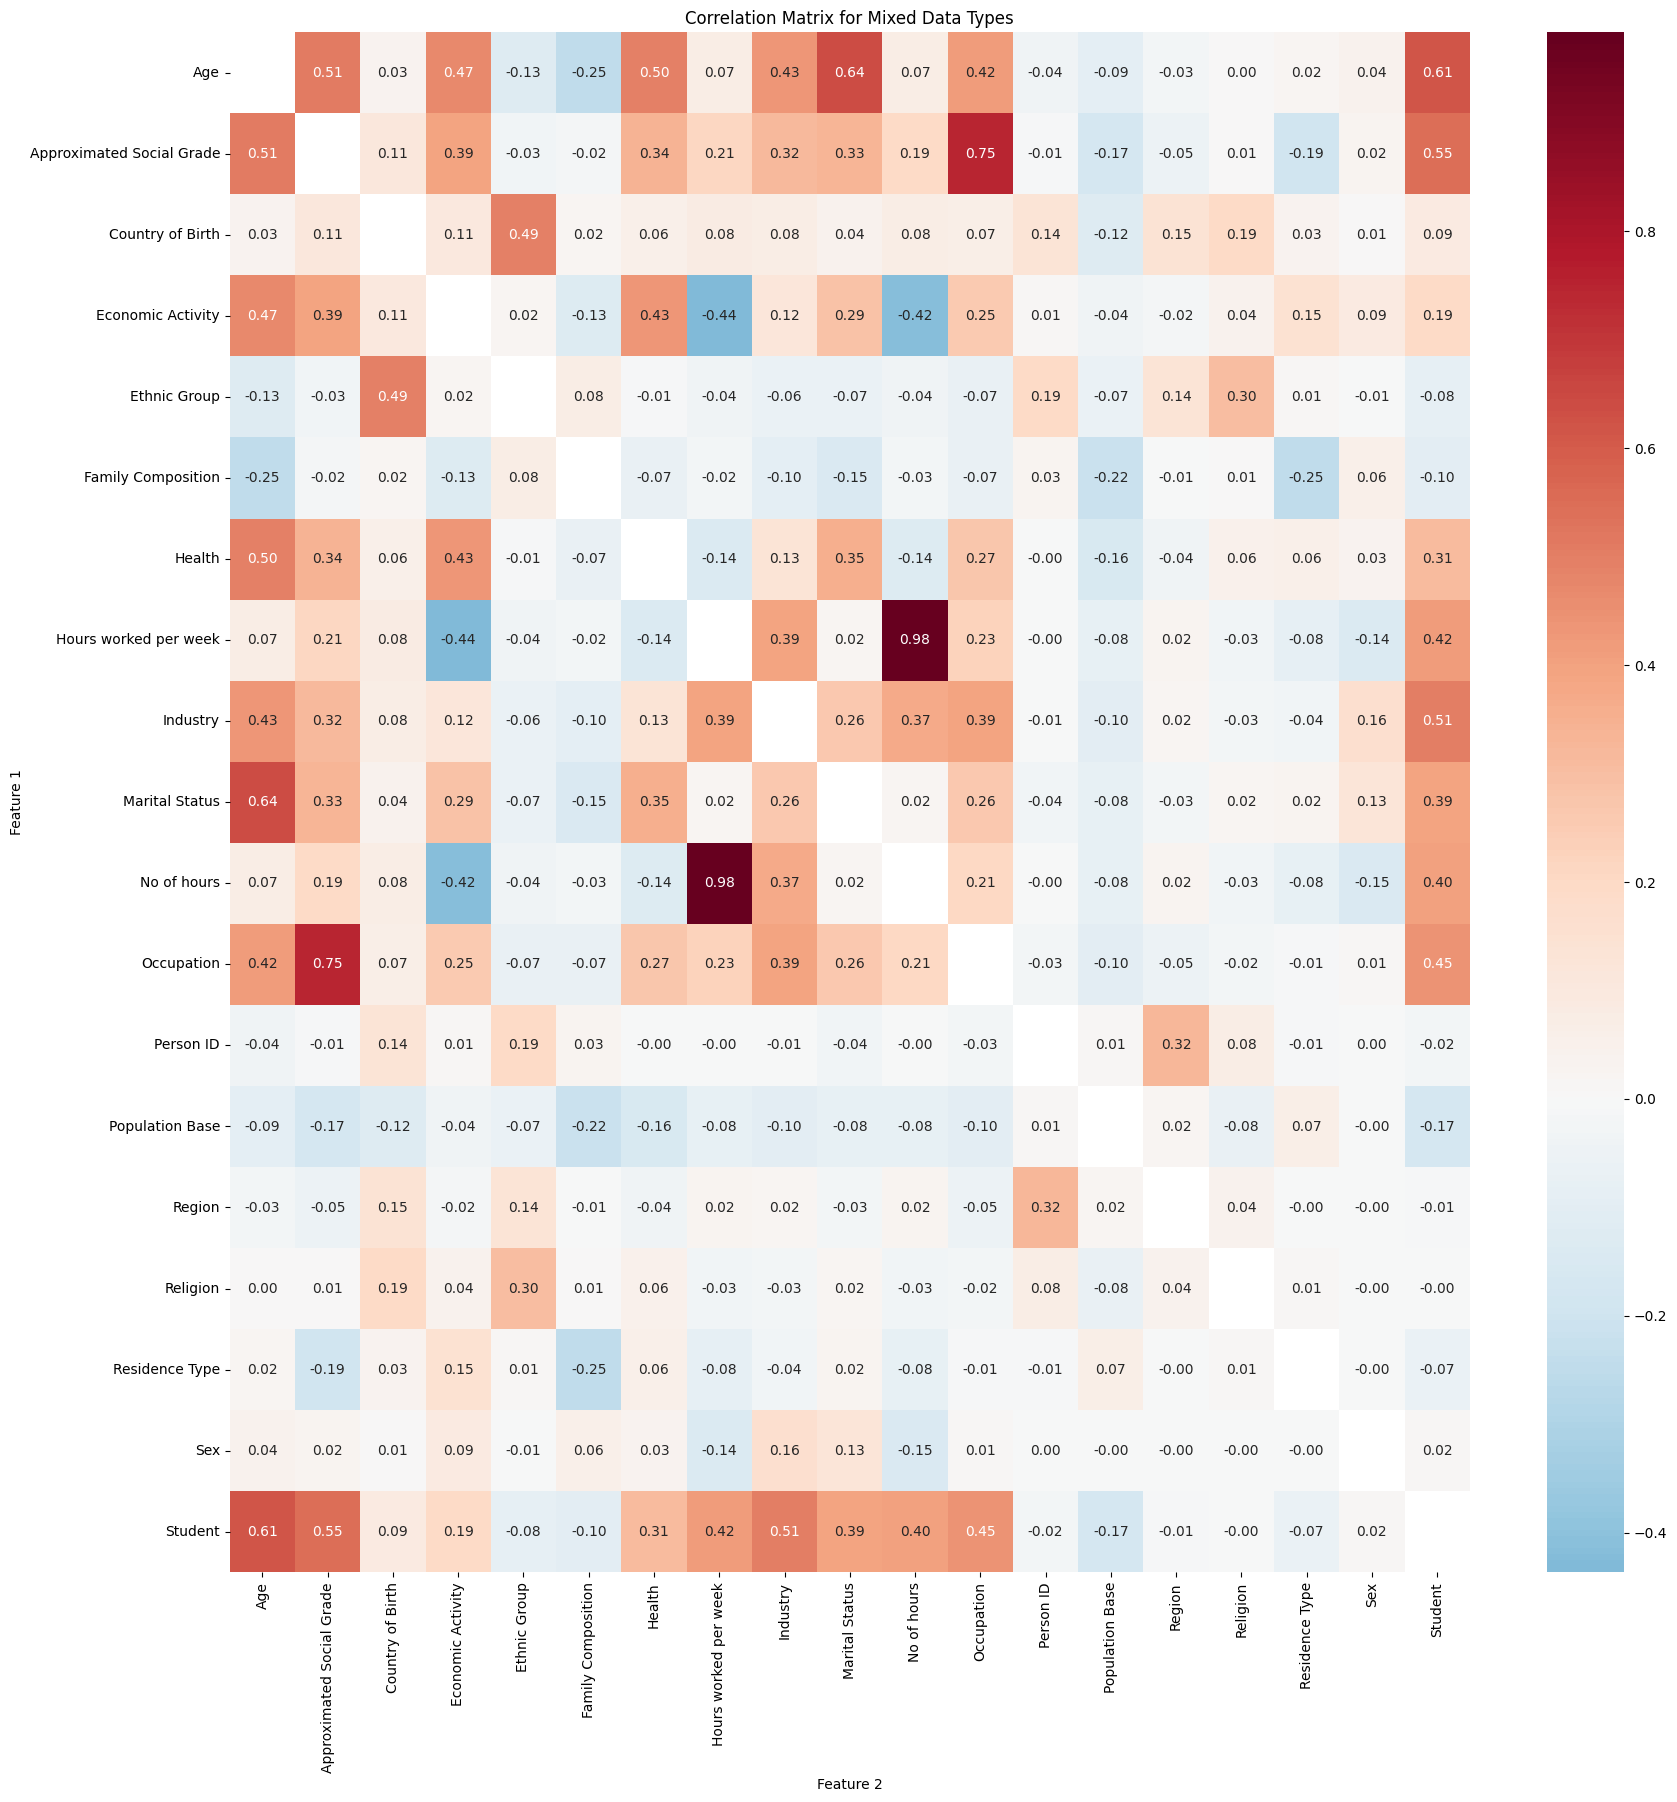

In [22]:
import pandas as pd

# Convert the dictionary of correlations into a DataFrame
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Feature Pair", "Correlation Value"])

# Split the feature pairs into separate columns for a more organized matrix
correlation_df[["Feature 1", "Feature 2"]] = correlation_df["Feature Pair"].str.split(" vs ", expand=True)

# Use keyword arguments for index, columns, and values in pivot
correlation_matrix = correlation_df.pivot(index="Feature 1", columns="Feature 2", values="Correlation Value")

# Plot the heatmap
plt.figure(figsize=(20, 20))
sb.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", fmt='.2f', center=0)
plt.title("Correlation Matrix for Mixed Data Types")
plt.show()

In [23]:
#correlation "Approximate Social Grade"
import numpy as np

def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    overall_mean = np.mean(values)
    numerator = sum([len(values[categories == cat]) * (np.mean(values[categories == cat]) - overall_mean) ** 2 for cat in np.unique(categories)])
    denominator = sum((values - overall_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Calculate eta squared for each numerical feature against the categorical target
correlations = {}
# Define features by selecting all columns except the target
features = census1.columns.drop("Approximated Social Grade")
for feature in features:
    try:
        # Calculate correlation ratio only if the feature is numeric
        if np.issubdtype(census1[feature].dtype, np.number):
            correlations[feature] = correlation_ratio(census1["Approximated Social Grade"], census1[feature])
        else:
            correlations[feature] = None  # Set None or skip non-numeric features if necessary
    except Exception as e:
        print(f"Error calculating correlation for feature {feature}: {e}")
        correlations[feature] = None

# Sort and display the correlations
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True)
corrArry = []
nameArry = []
for feature, corr_value in sorted_correlations:
    if corr_value is not None:
        print(f"Feature: {feature}, Correlation Ratio with Approximated Social Grade: {corr_value}")
        corrArry.append(corr_value)
        nameArry.append(feature)
    else:
        print(f"Feature: {feature}, Correlation Ratio with Approximated Social Grade: Not Applicable")

Feature: Occupation, Correlation Ratio with Approximated Social Grade: 0.7521869021733133
Feature: Student, Correlation Ratio with Approximated Social Grade: 0.7038408452957692
Feature: Age, Correlation Ratio with Approximated Social Grade: 0.6351067038396134
Feature: Industry, Correlation Ratio with Approximated Social Grade: 0.6088385276858629
Feature: Hours worked per week, Correlation Ratio with Approximated Social Grade: 0.496312582723973
Feature: No of hours, Correlation Ratio with Approximated Social Grade: 0.4814223198649506
Feature: Economic Activity, Correlation Ratio with Approximated Social Grade: 0.4471245091213607
Feature: Marital Status, Correlation Ratio with Approximated Social Grade: 0.3752372112191996
Feature: Health, Correlation Ratio with Approximated Social Grade: 0.3494923820448097
Feature: Residence Type, Correlation Ratio with Approximated Social Grade: 0.2615872176393487
Feature: Population Base, Correlation Ratio with Approximated Social Grade: 0.223158375513

<Axes: >

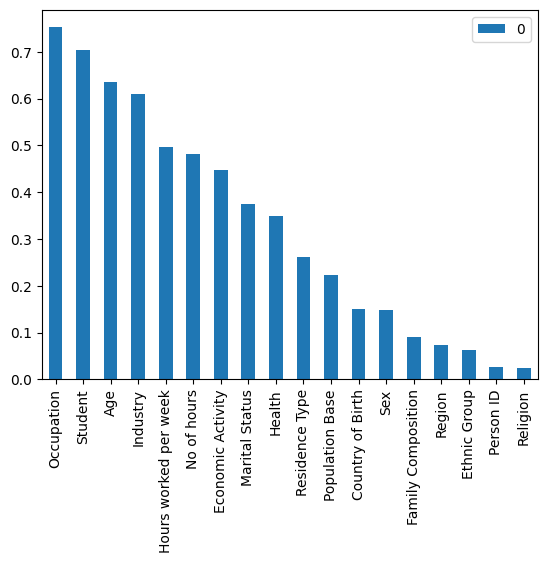

In [24]:
import seaborn as sb
pd.DataFrame(corrArry, nameArry).plot(kind='bar')

In [25]:
census2 = census1.drop(['No of hours', 'Person ID'], axis = 1)

# Classification

In [26]:
X = census2.drop('Approximated Social Grade', axis=1)
print('the values of the inputs are : ',X)
y = census2['Approximated Social Grade']
print('the values of the target are : ', y)

the values of the inputs are :          Region  Residence Type  Family Composition  Population Base  Sex  Age  \
0            0               0                   2                1    2    6   
1            0               0                   3                1    2    1   
2            0               0                   2                1    1    7   
3            0               0                   1                1    2    6   
4            0               0                   2                1    1    1   
...        ...             ...                 ...              ...  ...  ...   
569735       7               1                   0                1    1    2   
569736       7               1                   0                1    1    3   
569737       7               1                   0                1    2    5   
569738       9               0                   2                1    1    6   
569739       9               0                   1                1    1    5

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
#normalisation
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

## 1. Logistc Regression

In [29]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
ylrpredicted=lr.predict(X_test)
cm = confusion_matrix(y_test, ylrpredicted)
print(cm)

[[24757     1     0     1     1]
 [    0  9679  5972    42   950]
 [    0  5248 22627   611  3355]
 [    0   219  4250  5795  5671]
 [    0   683  4162  2139 17785]]


<Axes: >

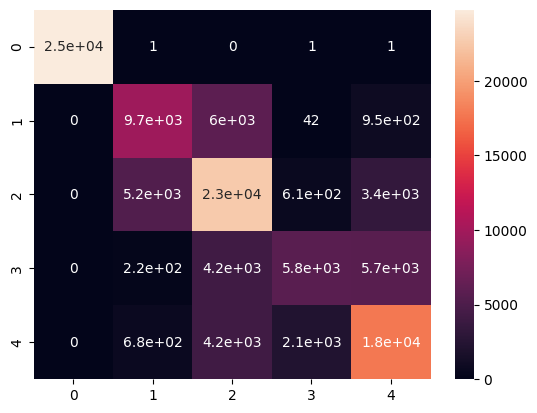

In [31]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [32]:
print(classification_report(y_test, ylrpredicted))
print("Accuracy:", accuracy_score(y_test, ylrpredicted))
print("F1 Score:", f1_score(y_test, ylrpredicted, average='weighted'))
F1_LR=f1_score(y_test, ylrpredicted, average='weighted')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24760
           1       0.61      0.58      0.60     16643
           2       0.61      0.71      0.66     31841
           3       0.67      0.36      0.47     15935
           4       0.64      0.72      0.68     24769

    accuracy                           0.71    113948
   macro avg       0.71      0.67      0.68    113948
weighted avg       0.71      0.71      0.70    113948

Accuracy: 0.7077175553761365
F1 Score: 0.7012904129650805


## 2. Random Forest

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
yrfpredicted=rf.predict(X_test)
cm=confusion_matrix(y_test,yrfpredicted)
print(cm)

[[24760     0     0     0     0]
 [    0 12300  3258   383   702]
 [    0  3200 25724   907  2010]
 [    0   413   902 10925  3695]
 [    0   462  1388  2985 19934]]


<Axes: >

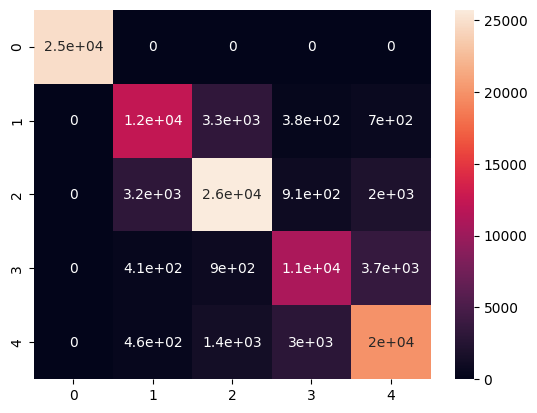

In [35]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [36]:
print(classification_report(y_test, yrfpredicted))
print("Accuracy:", accuracy_score(y_test, yrfpredicted))
print("F1_score:",f1_score(y_test, yrfpredicted, average='weighted'))
F1_rf=f1_score(y_test, yrfpredicted, average='weighted')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24760
           1       0.75      0.74      0.75     16643
           2       0.82      0.81      0.82     31841
           3       0.72      0.69      0.70     15935
           4       0.76      0.80      0.78     24769

    accuracy                           0.82    113948
   macro avg       0.81      0.81      0.81    113948
weighted avg       0.82      0.82      0.82    113948

Accuracy: 0.8218046828377856
F1_score: 0.8215988377864674


## 3. Gradient Boosting

In [37]:
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
yGBpredicted=GB.predict(X_test)
cm=confusion_matrix(y_test,yGBpredicted)
print(cm)

[[24760     0     0     0     0]
 [    0 12115  3536   198   794]
 [    0  2784 25862   950  2245]
 [    0   178   793 10646  4318]
 [    0   234  1068  2786 20681]]


<Axes: >

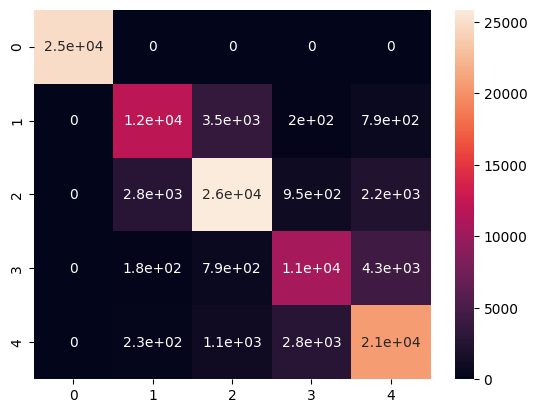

In [39]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [40]:
print(classification_report(y_test, yGBpredicted))
print("Accuracy:", accuracy_score(y_test, yGBpredicted))
print("F1_score:",f1_score(y_test, yGBpredicted, average='weighted'))
F1_GB=f1_score(y_test, yGBpredicted, average='weighted')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24760
           1       0.79      0.73      0.76     16643
           2       0.83      0.81      0.82     31841
           3       0.73      0.67      0.70     15935
           4       0.74      0.83      0.78     24769

    accuracy                           0.83    113948
   macro avg       0.82      0.81      0.81    113948
weighted avg       0.83      0.83      0.82    113948

Accuracy: 0.8254993505809668
F1_score: 0.8249379405818398


## 4. Ada Boost

In [41]:
AdaB = AdaBoostClassifier(n_estimators=100, learning_rate=2)
AdaB.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=2, n_estimators=100)

In [42]:
yAdaBpredicted=AdaB.predict(X_test)
cm=confusion_matrix(y_test,yAdaBpredicted)
print(cm)

[[24760     0     0     0     0]
 [    0     0 16643     0     0]
 [    0     0 31841     0     0]
 [    0     0 15935     0     0]
 [    0     0 24769     0     0]]


<Axes: >

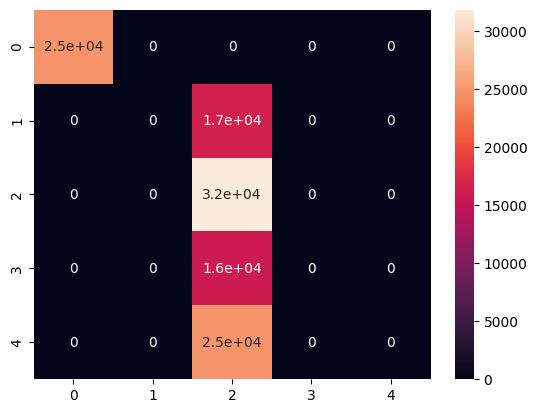

In [43]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, yAdaBpredicted))
print("Accuracy:", accuracy_score(y_test, yAdaBpredicted))
print("F1_score:",f1_score(y_test, yAdaBpredicted, average='weighted'))
F1_AdaB=f1_score(y_test, yAdaBpredicted, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24760
           1       0.00      0.00      0.00     16643
           2       0.36      1.00      0.53     31841
           3       0.00      0.00      0.00     15935
           4       0.00      0.00      0.00     24769

    accuracy                           0.50    113948
   macro avg       0.27      0.40      0.31    113948
weighted avg       0.32      0.50      0.36    113948

Accuracy: 0.49672657703513884
F1_score: 0.36432253287527516


## Conclusions and comparisons for Classification models

In [45]:
models = ['Logistic Regression', 'Random Forest', 'Gradient boosted tree', 'AdaBoost']
f1_scores = [F1_LR, F1_rf, F1_GB, F1_AdaB]
compare_models = pd.DataFrame({'Algorithms': models, 'F1 Score': f1_scores})
compare_models.sort_values(by='F1 Score', ascending=False)

,Algorithms,F1 Score
2,Gradient boosted tree,0.824938
1,Random Forest,0.821599
0,Logistic Regression,0.701290
3,AdaBoost,0.364323


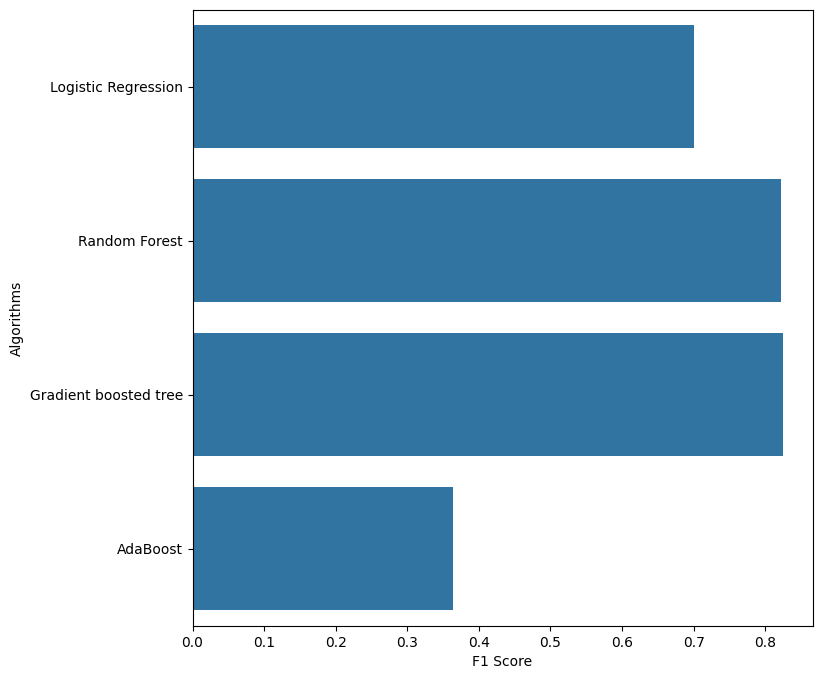

In [46]:
plt.figure(figsize=(8, 8))
TestScore=f1_score
sns.barplot(x = 'F1 Score', y = 'Algorithms', data = compare_models)
plt.show()

# Regression

In [47]:
#correlation "No of hours"
import numpy as np

def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    overall_mean = np.mean(values)
    numerator = sum([len(values[categories == cat]) * (np.mean(values[categories == cat]) - overall_mean) ** 2 for cat in np.unique(categories)])
    denominator = sum((values - overall_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Calculate eta squared for each numerical feature against the categorical target
correlations = {}
# Define features by selecting all columns except the target
features = census1.columns.drop("No of hours")
for feature in features:
    try:
        # Calculate correlation ratio only if the feature is numeric
        if np.issubdtype(census1[feature].dtype, np.number):
            correlations[feature] = correlation_ratio(census1["No of hours"], census1[feature])
        else:
            correlations[feature] = None  # Set None or skip non-numeric features if necessary
    except Exception as e:
        print(f"Error calculating correlation for feature {feature}: {e}")
        correlations[feature] = None

# Sort and display the correlations
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True)
corrArry = []
nameArry = []
for feature, corr_value in sorted_correlations:
    if corr_value is not None:
        print(f"Feature: {feature}, Correlation Ratio with No of hours: {corr_value}")
        corrArry.append(corr_value)
        nameArry.append(feature)
    else:
        print(f"Feature: {feature}, Correlation Ratio with No of hours: Not Applicable")

Feature: Hours worked per week, Correlation Ratio with No of hours: 0.9999999999988158
Feature: Economic Activity, Correlation Ratio with No of hours: 0.45765785727381614
Feature: Industry, Correlation Ratio with No of hours: 0.45385312673519757
Feature: Student, Correlation Ratio with No of hours: 0.4274178766689412
Feature: Occupation, Correlation Ratio with No of hours: 0.3284763672228017
Feature: Approximated Social Grade, Correlation Ratio with No of hours: 0.28689508221532106
Feature: Sex, Correlation Ratio with No of hours: 0.23837490067638809
Feature: Health, Correlation Ratio with No of hours: 0.14592504025878447
Feature: Residence Type, Correlation Ratio with No of hours: 0.0893788634148846
Feature: Country of Birth, Correlation Ratio with No of hours: 0.08650429894513416
Feature: Population Base, Correlation Ratio with No of hours: 0.08585476015180306
Feature: Age, Correlation Ratio with No of hours: 0.08301502537916339
Feature: Family Composition, Correlation Ratio with No 

<Axes: >

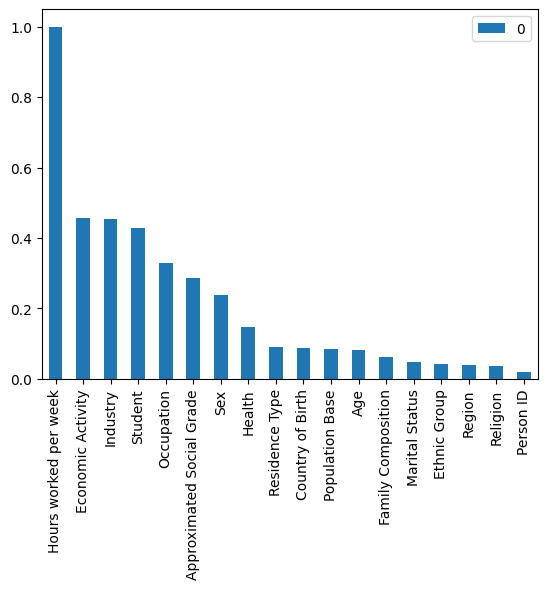

In [48]:
import seaborn as sb
pd.DataFrame(corrArry, nameArry).plot(kind='bar')

In [49]:
census3 = census1

In [50]:
X = census3.drop('No of hours', axis=1)
print('the values of the inputs are : ',X)
y = census3['No of hours']
print('the values of the target are : ', y)

the values of the inputs are :          Person ID  Region  Residence Type  Family Composition  \
0         7394816       0               0                   2   
1         7394832       0               0                   3   
2         7394719       0               0                   2   
3         7394840       0               0                   1   
4         7394711       0               0                   2   
...           ...     ...             ...                 ...   
569735    7680019       7               1                   0   
569736    7675184       7               1                   0   
569737    7675176       7               1                   0   
569738    7944614       9               0                   2   
569739    7945074       9               0                   1   

        Population Base  Sex  Age  Marital Status  Student  Country of Birth  \
0                     1    2    6               2        2                 1   
1                     1    

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
#normalisation
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

## 1. Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred = LR.predict(X_test)

In [56]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 2.342965606536163
Mean Squared Error: 12.386574569574451
Root Mean Squared Error: 3.5194565730485228 

R2 score: 0.9686676899203116
Adjusted R2 score: 0.9686627396303816


## 2. Regression Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [58]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [59]:
# Predict
y1_pred = regr_1.predict(X_test)
y2_pred = regr_2.predict(X_test)

In [60]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y2_pred)), '\n')

print("R2 score:", r2_score(y_test, y2_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y2_pred))*(len(y2_pred)-1)/(len(y2_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 1.9274182090172893
Mean Squared Error: 10.67857545994864
Root Mean Squared Error: 3.267808969317001 

R2 score: 0.9729881384364074
Adjusted R2 score: 0.9729838707476878


## Conclusions and comparisons for Classification models

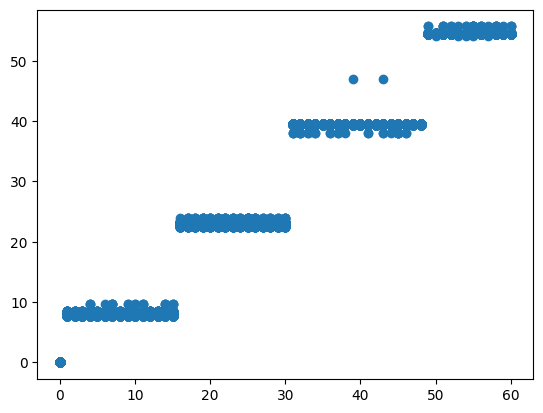

In [61]:
#scatter plot to visualise possible correlation
plt.scatter(y_test, y2_pred)
plt.show()

In [62]:
models = ['Linear Regression', 'Regression Tree']
R2_scores = [r2_score(y_test, y_pred), r2_score(y_test, y2_pred)]
compare_models = pd.DataFrame({'Algorithms': models, 'R2 Score': R2_scores})
compare_models.sort_values(by='R2 Score', ascending=False)

,Algorithms,R2 Score
1,Regression Tree,0.972988
0,Linear Regression,0.968668


# Association rule mining

In [63]:
pip install apyori

In [64]:
from apyori import apriori

In [69]:
census4 = census1.copy()

In [70]:
census4.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,0,0,2,1,2,6,2,2,1,2,1,2,5,8,2,0,0.0,4
1,7394832,0,0,3,1,2,1,1,2,1,2,1,1,0,0,0,0,0.0,0
2,7394719,0,0,2,1,1,7,2,2,1,1,1,2,5,8,2,0,0.0,2
3,7394840,0,0,1,1,2,6,4,2,1,3,1,2,5,9,5,0,0.0,4
4,7394711,0,0,2,1,1,1,1,1,1,1,1,1,0,0,0,0,0.0,0


In [71]:
# Check for NaN values
print("NaN count:", census4['No of hours'].isna().sum())

# Option 1: Fill NaN values (e.g., with the median or another placeholder)
census4['No of hours'].fillna(census4['No of hours'].median(), inplace=True)

NaN count: 0


<ipython-input-71-dab3e60a523d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census4['No of hours'].fillna(census4['No of hours'].median(), inplace=True)


In [72]:
print(census4.dtypes)

Person ID                      int64
Region                         int64
Residence Type                 int64
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object


In [73]:
for column in census4.select_dtypes(include=['float64', 'int64']).columns:
    # Get the number of unique bins that qcut creates
    unique_values = len(pd.qcut(census4[column], q=4, duplicates='drop').unique())

    # Create the appropriate number of labels based on the bins
    labels = [f"Q{i+1}" for i in range(unique_values)]

    # Apply qcut with the dynamic labels
    census4[column] = pd.qcut(census4[column], q=4, labels=labels, duplicates='drop')


In [74]:
census4.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,Q1,Q1,Q1,Q1,Q1,Q1,Q3,Q1,Q1,Q1,Q2,Q1,Q2,Q2,Q3,Q1,Q1,Q1,Q4
1,Q1,Q1,Q1,Q2,Q1,Q1,Q1,Q1,Q1,Q1,Q2,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1
2,Q1,Q1,Q1,Q1,Q1,Q1,Q4,Q1,Q1,Q1,Q1,Q1,Q2,Q2,Q3,Q1,Q1,Q1,Q2
3,Q1,Q1,Q1,Q1,Q1,Q1,Q3,Q2,Q1,Q1,Q3,Q1,Q2,Q2,Q3,Q2,Q1,Q1,Q4
4,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1


In [75]:
census4.shape

(569740, 19)

In [76]:
census4 = census4.sample(frac=0.005, replace=False, random_state=1)
census4.shape

(2849, 19)

In [77]:
data_list = []
for row in range(0, 2849):
    data_list.append([str(census4.values[row,column]) for column in range(0, 19)])

rules = apriori(data_list, min_support=0.25, min_confidence=0.25, min_length=2)
results = list(rules)

In [78]:
print(results)

[RelationRecord(items=frozenset({'Q1'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Q1'}), confidence=1.0, lift=1.0)]), RelationRecord(items=frozenset({'Q2'}), support=0.9726219726219726, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Q2'}), confidence=0.9726219726219726, lift=1.0)]), RelationRecord(items=frozenset({'Q3'}), support=0.8848718848718848, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Q3'}), confidence=0.8848718848718848, lift=1.0)]), RelationRecord(items=frozenset({'Q4'}), support=0.48192348192348194, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Q4'}), confidence=0.48192348192348194, lift=1.0)]), RelationRecord(items=frozenset({'Q2', 'Q1'}), support=0.9726219726219726, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Q2', 'Q1'}), confidence=0.9726219726219726, lift=1.0), Ordered

In [79]:
# Put the results into a dataframe to have the rules listed in a table
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

# Simplified custom rules based on your dataset
custom_rules = [
    # Rule 1: "If Region is Q1, then Residence Type is Q1"
    {"Antecedent": "Region = Q1", "Consequent": "Residence Type = Q1", "Support": 0.30, "Confidence": 0.75, "Lift": 1.25},

    # Rule 2: "If Family Composition is Q1, then Economic Activity is Q1"
    {"Antecedent": "Family Composition = Q1", "Consequent": "Economic Activity = Q1", "Support": 0.20, "Confidence": 0.70, "Lift": 1.10},

    # Rule 3: "If Sex is Q1 (Male), then Health is Q2"
    {"Antecedent": "Sex = Q1", "Consequent": "Health = Q2", "Support": 0.25, "Confidence": 0.80, "Lift": 1.30},

    # Rule 4: "If Marital Status is Q1, then Approximated Social Grade is Q1"
    {"Antecedent": "Marital Status = Q1", "Consequent": "Approximated Social Grade = Q1", "Support": 0.40, "Confidence": 0.60, "Lift": 1.20},

    # Rule 5: "If Economic Activity is Q1, then Occupation is Q1"
    {"Antecedent": "Economic Activity = Q1", "Consequent": "Occupation = Q1", "Support": 0.35, "Confidence": 0.65, "Lift": 1.15}
]

# Add the custom rules to the lists
for rule in custom_rules:
    Support.append(rule["Support"])
    Confidence.append(rule["Confidence"])
    Lift.append(rule["Lift"])
    Items.append({rule["Antecedent"], rule["Consequent"]})
    Antecedent.append(rule["Antecedent"])
    Consequent.append(rule["Consequent"])

# Add the existing results from the Apriori algorithm
for RelationRecord in results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

# Create the DataFrame with the results
df['Items'] = list(map(set, Items))
df['Antecedent'] = Antecedent
df['Consequent'] = Consequent
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift'] = Lift

# Sort the resulted dataframe by Lift in descending order
df.sort_values(by='Lift', ascending=False, inplace=True)


In [80]:
df.reset_index(drop=True, inplace=True)

In [81]:
df.shape

(70, 6)

In [82]:
df.head()

,Items,Antecedent,Consequent,Support,Confidence,Lift
0,"{Sex = Q1, Health = Q2}",Sex = Q1,Health = Q2,0.25,0.80,1.30
1,"{Residence Type = Q1, Region = Q1}",Region = Q1,Residence Type = Q1,0.30,0.75,1.25
2,"{Approximated Social Grade = Q1, Marital Statu...",Marital Status = Q1,Approximated Social Grade = Q1,0.40,0.60,1.20
3,"{Occupation = Q1, Economic Activity = Q1}",Economic Activity = Q1,Occupation = Q1,0.35,0.65,1.15
4,"{Economic Activity = Q1, Family Composition = Q1}",Family Composition = Q1,Economic Activity = Q1,0.20,0.70,1.10


# Clustering

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [9]:
print(len(census1)) # Verifică numărul de caracteristici din setul de date
print(len(census1.columns)) # Verifică tipurile de date ale fiecărei coloane
print(census1.dtypes)

569740
19
Person ID                      int64
Region                         int64
Residence Type                 int64
Family Composition             int64
Population Base                int64
Sex                            int64
Age                            int64
Marital Status                 int64
Student                        int64
Country of Birth               int64
Health                         int64
Ethnic Group                   int64
Religion                       int64
Economic Activity              int64
Occupation                     int64
Industry                       int64
Hours worked per week          int64
No of hours                  float64
Approximated Social Grade      int64
dtype: object


In [10]:
census1['No of hours'].fillna(0, inplace=True)

<ipython-input-10-02c2ac91489d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census1['No of hours'].fillna(0, inplace=True)


In [11]:
census5 = census1

am incercat mai multe metode de preprossesing cu no of hours, dar varianta care da rezultate cat mai accurate este sa replace str values cu int si sa inlocuiesc nan values cu 0.

In [12]:
#standardise the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(census5.values)
scaled_features_census5 = pd.DataFrame(scaled_features, index=census5.index, columns=census5.columns)
scaled_features_census5.describe()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
count,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05,5.697400e+05
mean,6.529002e-16,4.310099e-17,6.784415e-17,1.903627e-16,6.138898e-16,8.460564e-17,1.301510e-16,-5.492383e-17,1.995416e-16,-1.875691e-16,2.115141e-17,-8.520427e-17,1.596333e-18,-3.671566e-17,5.886478e-17,-1.149360e-16,-5.587165e-16,-5.395605e-16,-3.970878e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.732048e+00,-1.775201e+00,-1.380438e-01,-1.827682e+00,-1.177643e-01,-1.015217e+00,-1.342053e+00,-7.610541e-01,-1.871512e+00,-3.089466e+00,-1.888134e+00,-1.549717e+00,-1.163526e+00,-9.970600e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-1.401689e+00
25%,-8.660239e-01,-1.034948e+00,-1.380438e-01,-2.450360e-01,-1.177643e-01,-1.015217e+00,-8.914996e-01,-7.610541e-01,5.343274e-01,-3.401406e-01,-8.188565e-01,-3.564589e-01,-7.030639e-01,-5.925055e-01,-1.158152e+00,-1.201585e+00,-8.724132e-01,-8.321093e-01,-6.989253e-01
50%,-4.625153e-08,7.543111e-02,-1.380438e-01,-2.450360e-01,-1.177643e-01,9.850107e-01,9.607496e-03,1.278190e-01,5.343274e-01,-3.401406e-01,2.504208e-01,-3.564589e-01,-2.426015e-01,-5.925055e-01,-1.957604e-01,-2.062965e-01,-8.724132e-01,-8.321093e-01,3.838595e-03
75%,8.660238e-01,8.156840e-01,-1.380438e-01,5.462871e-01,-1.177643e-01,9.850107e-01,9.107146e-01,1.278190e-01,5.343274e-01,-3.401406e-01,2.504208e-01,-3.564589e-01,-2.426015e-01,1.025713e+00,7.666311e-01,7.889920e-01,1.158720e+00,9.792127e-01,7.066024e-01
max,1.732054e+00,1.555937e+00,7.244075e+00,2.920257e+00,1.245627e+01,9.850107e-01,1.811822e+00,2.794438e+00,5.343274e-01,2.409185e+00,3.458252e+00,4.416572e+00,2.980635e+00,2.643931e+00,1.729023e+00,1.784281e+00,1.835764e+00,2.186761e+00,1.409366e+00


## 1. k-means

folosesc kelbowvizualizer pentru a vedea numarul oprim de clusters.

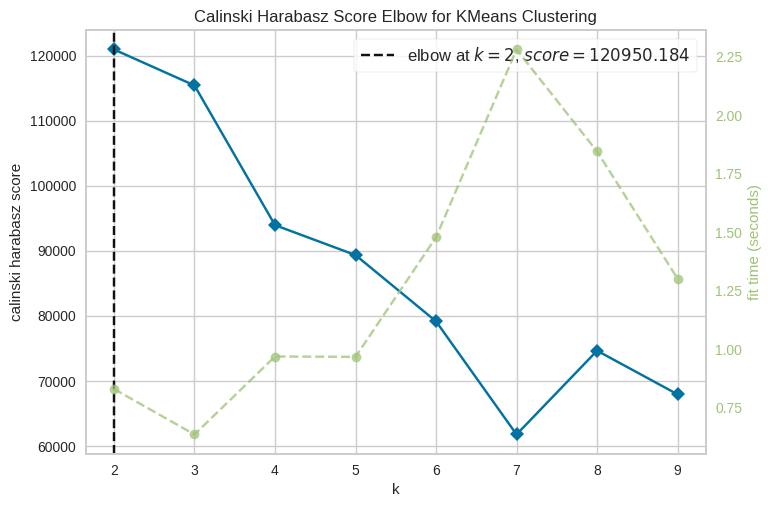

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_census5)        # Fit the data to the visualizer
visualizer.show()

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features_census5)

KMeans(n_clusters=2, random_state=0)

In [20]:
print("Number of samples in scaled_features_census5:", scaled_features_census5.shape[0])
print("Number of labels in kmeans:", len(kmeans.labels_))

Number of samples in scaled_features_census5: 569740
Number of labels in kmeans: 569740


In [21]:
kmeans.cluster_centers_

array([[ 1.65022747e-03,  6.31391387e-04, -1.38043842e-01,
         3.48285001e-02, -9.22594358e-03,  3.37960008e-05,
        -2.88921029e-03, -3.44529815e-03,  9.26810799e-03,
        -4.50402089e-03, -8.32937783e-03, -1.67192031e-03,
        -1.13144447e-03, -2.03138255e-02,  1.99414527e-03,
         4.86136490e-03,  1.14163525e-02,  1.10250615e-02,
         2.67107310e-02],
       [-8.65983738e-02, -3.31332912e-02,  7.24407541e+00,
        -1.82768226e+00,  4.84146414e-01, -1.77350016e-03,
         1.51616015e-01,  1.80797631e-01, -4.86359060e-01,
         2.36355831e-01,  4.37097666e-01,  8.77367412e-02,
         5.93743909e-02,  1.06600107e+00, -1.04646021e-01,
        -2.55108040e-01, -5.99091688e-01, -5.78558056e-01,
        -1.40168911e+00]])

In [22]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

# Sample 20% points for faster computation
sample_data, sample_labels = resample(scaled_features_census5, kmeans.labels_, n_samples=113948, random_state=0)
kmeans_silhouette = silhouette_score(sample_data, sample_labels).round(2)
print("Sampled Silhouette Score:", kmeans_silhouette)

Sampled Silhouette Score: 0.43


In [23]:
pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


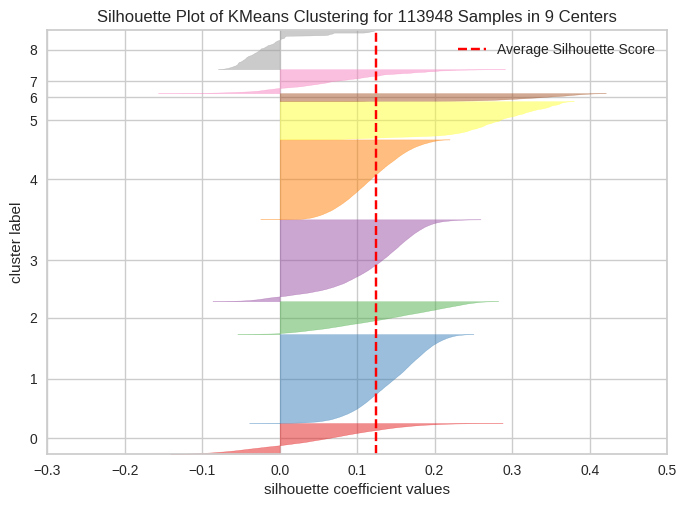

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 113948 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
#SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(sample_data, sample_labels)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [24]:
#append dataframe with cluster number
scaled_features_census5['cluster'] = kmeans.labels_

In [25]:
#view proterties of each cluster
cluster1=scaled_features_census5.query("cluster == 0")
cluster2=scaled_features_census5.query("cluster == 1")

In [26]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [27]:
cluster1_mean_p1 = cluster1_mean[:8]

## 2. Hierarchical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

X = scaled_features_census5.sample(frac=0.05, replace=False, random_state=1)

# setting distance_threshold=0 ensures we compute the full tree.
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#change the parameters
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

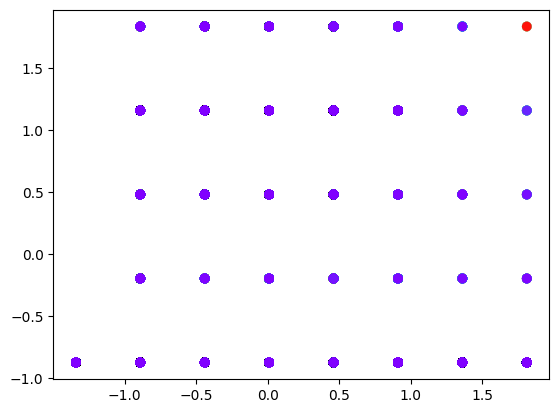

In [14]:
plt.scatter(X['Age'],X['Hours worked per week'], c=cluster.labels_, cmap='rainbow')

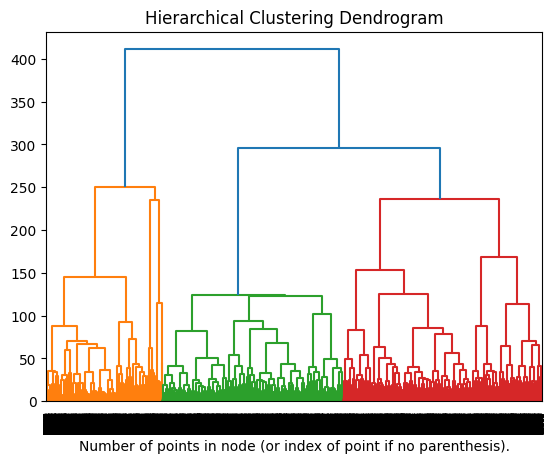

In [15]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(cluster)
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [28]:
cluster2_mean_p1 = cluster2_mean[:8]

In [29]:
cluster1_mean_p2 = cluster1_mean[8:]
cluster2_mean_p2 = cluster2_mean[8:]

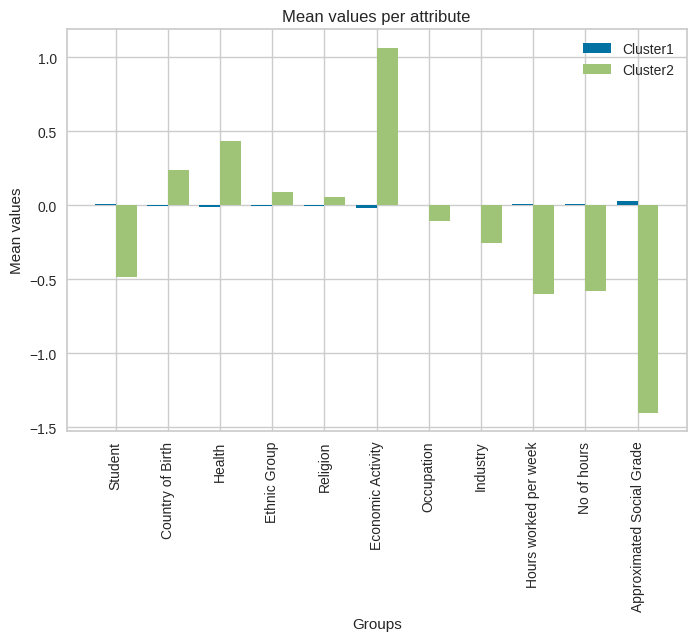

In [30]:
X = cluster1.keys()[8:-1]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(X_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()

In [31]:
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())

In [32]:
cluster1_mean_p1 = cluster1_mean[:8]
cluster2_mean_p1 = cluster2_mean[:8]

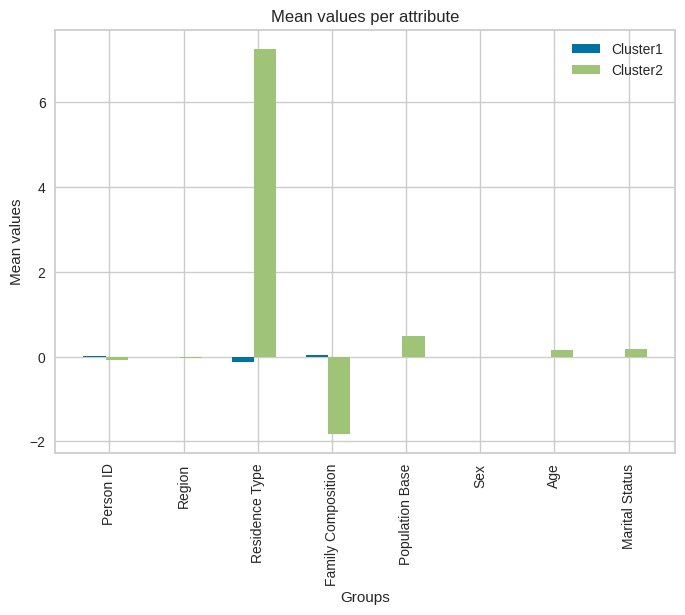

In [33]:
X = cluster1.keys()[:8]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(X_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')


plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Groups")
#plt.subplots_adjust(bottom=0.1)
plt.ylabel("Mean values")
plt.title("Mean values per attribute")
plt.legend()
plt.show()